In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
from __future__ import print_function
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.datasets import imdb
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
import os
import pandas as pd
import numpy as np
import sys
from tqdm import tqdm

filename = '/content/drive/My Drive/datasets/EEGs_Guinea-Bissau_transposed/'
list = os.listdir(filename)
list.sort()

row = 2
count = 3
data = []
for name in tqdm(list):
    file = os.path.join(filename, name)
    # df = pd.read_csv(file, header=None, error_bad_lines=False, nrows=2)
    df = pd.read_csv(file, header=None, error_bad_lines=False)
    values = df.values[row - 1]
    data.append(values.tolist())
data = np.asarray(data)

100%|██████████| 97/97 [04:43<00:00,  2.92s/it]


In [ ]:
print(data.shape)
# print(data)

(97,)


In [4]:
label_path = '/content/drive/My Drive/Colab Notebooks/Epilipsy_eeg/metadata_guineabissau.csv'
data_L = pd.read_csv(label_path, error_bad_lines=False, usecols=[0,1])
values_label = data_L.values
# print(values_label)
labels = []

for i in values_label:
    if(i[1] == 'Control'):
        labels.append(0)
    else:
        labels.append(1)
labels = np.asarray(labels)

In [5]:
print(type(labels))
print(len(labels))

<class 'numpy.ndarray'>
97


In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.33, random_state=42)

In [7]:
print(type(x_train))
print(x_train.shape)
print(x_test.shape)
print(type(x_train[0]))
print(len(x_train[0]))
print(x_train[0])

<class 'numpy.ndarray'>
(64,)
(33,)
<class 'list'>
33470
[4120.512820512819, 4113.846153846161, 4115.384615384621, 4116.41025641026, 4116.923076923079, 4112.82051282051, 4110.76923076923, 4116.41025641026, 4115.384615384621, 4106.6666666666715, 4106.6666666666715, 4109.23076923077, 4105.64102564103, 4107.69230769231, 4108.20512820513, 4104.10256410257, 4108.71794871795, 4107.17948717949, 4095.3846153846202, 4088.717948717949, 4084.615384615391, 4082.05128205128, 4084.615384615391, 4086.666666666672, 4082.5641025641, 4077.94871794872, 4075.8974358974397, 4076.92307692308, 4078.97435897436, 4076.41025641026, 4075.8974358974397, 4075.8974358974397, 4070.7692307692296, 4065.6410256410304, 4057.4358974359, 4042.5641025641, 4034.3589743589796, 4040.0, 4046.1538461538494, 4041.02564102564, 4032.8205128205104, 4032.307692307689, 4035.8974358974397, 4031.2820512820495, 4020.0, 4021.53846153846, 4035.8974358974397, 4040.0, 4033.84615384616, 4033.84615384616, 4036.41025641026, 4032.8205128205104,

In [8]:
maxlen = 400

In [9]:

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

print(type(x_train))
print(x_train.shape)
print(x_test.shape)
print(type(x_train[0]))
print(len(x_train[0]))
# print(x_train[0])

Pad sequences (samples x time)
<class 'numpy.ndarray'>
(64, 400)
(33, 400)
<class 'numpy.ndarray'>
400


In [11]:
print('Build model...')

batch_size = 32
embedding_dims = 5
filters = 80
kernel_size = 3
hidden_dims = 300
epochs = 500
max_features = 10000

model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model.add(Embedding(max_features, embedding_dims, input_length=maxlen))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu', strides=1))
# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Build model...


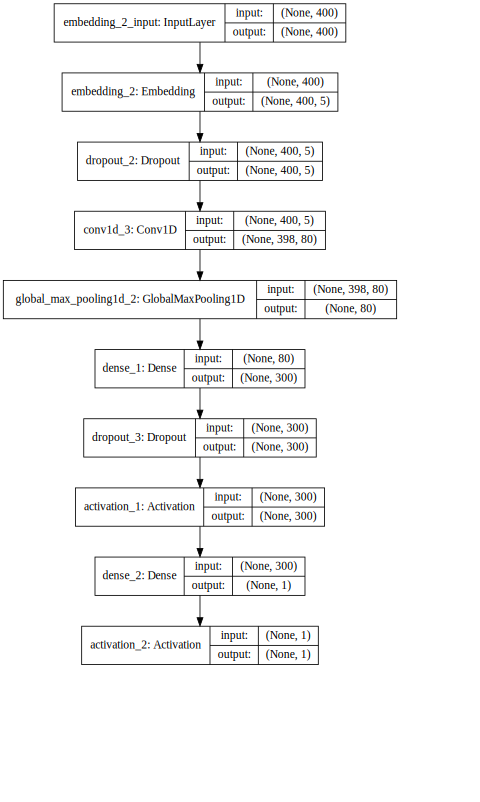

In [12]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
figure = SVG(model_to_dot(model,show_shapes = True, show_layer_names=True, dpi=60).create(prog='dot', format='svg'))
display(figure)

# Save the model as png file
# from keras.utils import plot_model
# plot_model(model, to_file='model.png')

In [13]:
x_train.shape

(64, 400)

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 400, 5)            50000     
_________________________________________________________________
dropout_2 (Dropout)          (None, 400, 5)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 398, 80)           1280      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 80)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               24300     
_________________________________________________________________
dropout_3 (Dropout)          (None, 300)               0         
_________________________________________________________________
activation_1 (Activation)    (None, 300)              

In [15]:
pathModelSave = '/content/drive/My Drive/saveModels/epi_eeg_conv1D'+str(embedding_dims)+'_'+str(filters)+'_'+str(batch_size)+'_'+str(epochs)+'_.hdf5'
pathToSaveCSV = '/content/drive/My Drive/saveModels/epi_eeg_conv1D'+str(embedding_dims)+'_'+str(filters)+'_'+str(batch_size)+'_'+str(epochs)+'_.csv'

In [16]:
pathModelSave

'/content/drive/My Drive/saveModels/epi_eeg_conv1D5_80_32_500_.hdf5'

In [17]:
import time
from keras.callbacks import ModelCheckpoint
from keras.callbacks import CSVLogger

checkpoint = ModelCheckpoint(pathModelSave, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
csv_logger = CSVLogger(pathToSaveCSV, append=False, separator=',')


tic = time.clock()
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          callbacks = [checkpoint, csv_logger], 
          validation_data=(x_test, y_test))
toc = time.clock()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 64 samples, validate on 33 samples
Epoch 1/500
64/64 [==============================] - 7s 110ms/step - loss: 0.6928 - accuracy: 0.5000 - val_loss: 0.6939 - val_accuracy: 0.4848

Epoch 00001: val_accuracy improved from -inf to 0.48485, saving model to /content/drive/My Drive/saveModels/epi_eeg_conv1D5_80_32_500_.hdf5
Epoch 2/500
64/64 [==============================] - 0s 271us/step - loss: 0.6914 - accuracy: 0.5469 - val_loss: 0.6946 - val_accuracy: 0.4848

Epoch 00002: val_accuracy did not improve from 0.48485
Epoch 3/500
64/64 [==============================] - 0s 252us/step - loss: 0.6903 - accuracy: 0.5469 - val_loss: 0.6949 - val_accuracy: 0.4848

Epoch 00003: val_accuracy did not improve from 0.48485
Epoch 4/500
64/64 [==============================] - 0s 262us/step - loss: 0.6904 - accuracy: 0.5469 - val_loss: 0.6957 - val_accuracy: 0.4848

Epoch 00004: val_accuracy did not improve from 0.48485
Epoch 5/500
64/64 [==============================] - 0s 261us/step - loss: 

In [18]:
time = (toc-tic)/60
print("Total training time is: ", time)

Total training time is:  0.21749253333333343


In [19]:
# acc, tt, maxlen, batch_size, embedding_dims, filters, kernel_size, hidden_dims, epochs, max_features

# acc is> 63.636 %, training time: 3.5008042666666674 minutes, epochs: 500 , of row number: 1

# acc> 69.697 %, training time: 3.46182841666667 minutes, epochs: 500, of row number: 2
# acc> 72.727 %, training time: 3.3446347999999984 minutes, epochs: 500 , of row number: 2, embedding_dims = 10
# acc> 75.758 %, training time: 2.741828716666665 minutes, epochs: 500 , of row number: 2, embedding_dims = 5, filters = 500
# acc> 78.788 %, training time: 1.6362712333333358 minutes, epochs: 500 , of row number: 2, embedding_dims = 5, filters = 300
# acc> 75.758 %, training time: 0.7132113000000042 minutes, epochs: 500 , of row number: 2, embedding_dims = 5, filters = 100
# acc> 66.667 %, training time: 2.506303183333334 minutes, epochs: 500 , of row number: 2, embedding_dims = 1
# acc> 75.758 %, tt: 1.447697766666668 , ml: 400 , bs: 32 , e_d: 5 , f: 250 , k_s: 3 , h_d: 300 , epo: 500 , m_f: 10000 , of row number: 2
# acc> 78.788 %, tt: 0.6641772166666665 , ml: 400 , bs: 32 , e_d: 5 , f: 100 , k_s: 3 , h_d: 300 , epo: 500 , m_f: 10000 , of row number: 2
# acc> 78.788 %, tt: 0.6137760833333336 , ml: 400 , bs: 32 , e_d: 5 , f: 80 , k_s: 3 , h_d: 300 , epo: 500 , m_f: 10000 , of row number: 2
# acc> 72.727 %, tt: 0.6878068500000002 , ml: 400 , bs: 32 , e_d: 5 , f: 100 , k_s: 3 , h_d: 300 , epo: 500 , m_f: 10000 , of row number: 2
# acc> 57.576 %, tt: 0.5758620166666665 , ml: 400 , bs: 32 , e_d: 5 , f: 80 , k_s: 3 , h_d: 300 , epo: 500 , m_f: 10000 , of row number: 2
# acc> 81.818 %, tt: 3.9183356833333334 , ml: 400 , bs: 32 , e_d: 5 , f: 80 , k_s: 3 , h_d: 300 , epo: 500 , m_f: 10000 , of row number: 2

# acc> 66.667 %, training time: 3.4640891666666676 minutes, epochs: 500 , of row number: 3
# acc> 57.576 %, training time: 3.448260916666671 minutes, epochs: 500 , of row number: 4
# acc> 48.485 %, training time: 3.427449133333327 minutes, epochs: 500 , of row number: 5
# acc> 60.606 %, training time: 3.4405400999999984 minutes, epochs: 500 , of row number: 6
# acc> 63.636 %, training time: 3.4387500333333265 minutes, epochs: 500 , of row number: 7
# acc> 63.636 %, training time: 3.4518071500000134 minutes, epochs: 500 , of row number: 8
# acc> 57.576 %, training time: 3.4472725833333393 minutes, epochs: 500 , of row number: 9
# acc> 54.545 %, training time: 3.4592532333333263 minutes, epochs: 500 , of row number: 10
# acc> 57.576 %, training time: 3.4602110666666706 minutes, epochs: 500 , of row number: 11
# acc> 63.636 %, training time: 3.4787185500000004 minutes, epochs: 500 , of row number: 12
# acc> 63.636 %, training time: 3.463477883333341 minutes, epochs: 500 , of row number: 13
# acc> 66.667 %, training time: 3.500132116666676 minutes, epochs: 500 , of row number: 14

_, acc = model.evaluate(x_test, y_test, verbose=0)
print('acc> %.3f' % (acc* 100.0), '%, tt:', time,', ml:',maxlen,', bs:',batch_size,', e_d:',embedding_dims,
      ', f:',filters,', k_s:',kernel_size,', h_d:',hidden_dims,', epo:',epochs,', m_f:',max_features,', of row number:',row)

acc> 75.758 %, tt: 0.21749253333333343 , ml: 400 , bs: 32 , e_d: 5 , f: 80 , k_s: 3 , h_d: 300 , epo: 500 , m_f: 10000 , of row number: 2


In [20]:
from keras.models import load_model
model_new = load_model(pathModelSave) 
# model_new = load_model('/content/drive/My Drive/saveModels/epi_eeg_conv1D5_80_32_500_81_percent.hdf5')

_, acc = model_new.evaluate(x_test, y_test, verbose=0)
print('acc> %.3f' % (acc* 100.0), '%, tt:', time,', ml:',maxlen,', bs:',batch_size,', e_d:',embedding_dims,
      ', f:',filters,', k_s:',kernel_size,', h_d:',hidden_dims,', epo:',epochs,', m_f:',max_features,', of row number:',row)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


acc> 81.818 %, tt: 0.21749253333333343 , ml: 400 , bs: 32 , e_d: 5 , f: 80 , k_s: 3 , h_d: 300 , epo: 500 , m_f: 10000 , of row number: 2


In [21]:
# acc> 81.818 %, tt: <module 'time' (built-in)> , ml: 400 , bs: 32 , e_d: 5 , f: 80 , k_s: 3 , h_d: 300 , epo: 500 , m_f: 10000 , of row number: 1

In [22]:
results = model_new.evaluate(x_test, y_test)
print ("Accuracy on test set:" , results)
print('Test loss:', results[0])
print('Test accuracy:', results[1])

33/33 [==============================] - 0s 141us/step
Accuracy on test set: [1.2269109378552403, 0.8181818127632141]
Test loss: 1.2269109378552403
Test accuracy: 0.8181818127632141


In [23]:
# 33/33 [==============================] - 0s 325us/step
# Accuracy on test set: [0.7010896258430104, 0.8181818127632141]
# Test loss: 0.7010896258430104
# Test accuracy: 0.8181818127632141

(array([ 7.,  3.,  2.,  1.,  2.,  1.,  1.,  0.,  1., 15.]),
 array([6.1154045e-04, 1.0055035e-01, 2.0048916e-01, 3.0042797e-01,
        4.0036678e-01, 5.0030559e-01, 6.0024440e-01, 7.0018321e-01,
        8.0012202e-01, 9.0006083e-01, 9.9999964e-01], dtype=float32),
 <a list of 10 Patch objects>)

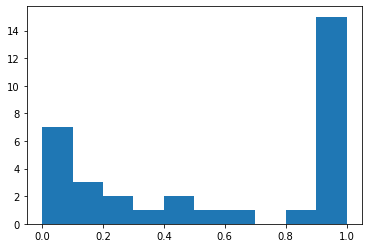

In [24]:
plt.hist(model_new.predict(x_test))

[0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1]
[0 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


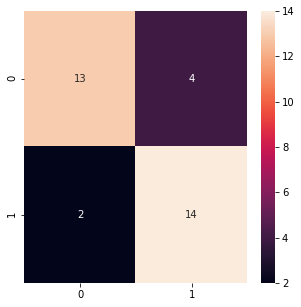

In [25]:
from sklearn.metrics import confusion_matrix
Y_prediction = model_new.predict(x_test)
Y_pred_classes = []
for i in Y_prediction:
  if i[0] < 0.5:
    Y_pred_classes.append(0)
  else:
    Y_pred_classes.append(1)

Y_pred_classes = np.asarray(Y_pred_classes)
print(Y_pred_classes)
print(y_test)
confusion_mtx = confusion_matrix(y_test, Y_pred_classes)

import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(confusion_mtx, annot=True, fmt="d");

In [26]:
pathModelSave

'/content/drive/My Drive/saveModels/epi_eeg_conv1D5_80_32_500_.hdf5'

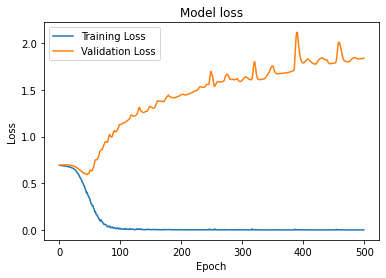

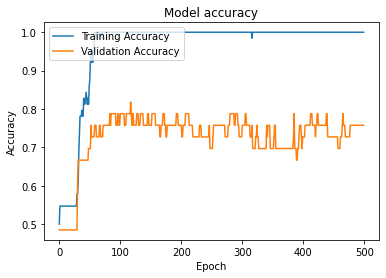

In [27]:
# author Manoj kaushik
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

In [28]:
print(pathModelSave)

/content/drive/My Drive/saveModels/epi_eeg_conv1D5_80_32_500_.hdf5


In [29]:
# testing accuracies
import time
from keras.models import load_model
model = load_model('/content/drive/My Drive/saveModels/epi_eeg_conv1D5_80_32_500_81_percent.hdf5')

def predict_fun(filename, type, row):
  list = os.listdir(filename)
  list.sort()
  tic = time.clock()
  count_control = 0
  count = 0
  for name in list:
      count += 1
      file = os.path.join(filename, name)
      df = pd.read_csv(file, header = None, error_bad_lines = False)
      values = df.values[row - 1]
      data = []
      data.append(values.tolist())
      data = np.asarray(data)
      values = sequence.pad_sequences(data, maxlen = maxlen)
      p = model.predict(values)[0][0]
      if p < 0.5:
        count_control += 1
      #   print(count, '. ', name, ": Control predicted")
      # else :
      #   print(count, '. ', name, ": Epilipsy Pridicted")
  toc = time.clock()
  total_ele = len(list)
  print('total files of ' + str(type)+' are :', count, ' control predicted:', count_control, ' epilipsy predicted:', count - count_control, '| row',row)

OSError: ignored

In [ ]:
# total files of control are : 93  control predicted: 57  epilipsy predicted: 36 | row 8
# total files of epilipsy are : 128  control predicted: 64  epilipsy predicted: 64 | row 8

# total files of control are : 46  control predicted: 43  epilipsy predicted: 3 | row 2
# total files of epilipsy are : 51  control predicted: 3  epilipsy predicted: 48 | row 2

In [ ]:
predict_fun('/content/drive/My Drive/datasets/EEGs_Nigeria_transposed/control/', 'control', 8)
predict_fun('/content/drive/My Drive/datasets/EEGs_Nigeria_transposed/epilipsy/', 'epilipsy',8)

In [ ]:
predict_fun('/content/drive/My Drive/datasets/EEGs_Guinea-Bissau_classified/control/', 'control', 2)
predict_fun('/content/drive/My Drive/datasets/EEGs_Guinea-Bissau_classified/epilipsy/', 'epilipsy', 2)